## Equally-Weighted Portfolio Backtest.

In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [4]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:03<00:00, 83.72it/s]


StrategyStatistics:
* final_nav = 6.155802
* geom_avg_total_r = 0.100306
* geom_avg_xs_r = 0.092527
* std_xs_r = 0.205518
* min_xs_r = -0.109358
* max_xs_r = 0.105886
* skew = -0.060458
* kurtosis = 10.086017
* max_dd = -0.497524
* sharpe = 0.450213
* alpha_buy_hold = 0.022734
* tracking_error_buy_hold = 0.044027
* ir_buy_hold = 0.516359
* factor_loadings = {'low_risk': 0.20924523357266356, 'momentum': -0.06756076547730458, 'quality': -0.052268223256379705, 'size': 0.017823391274947555, 'value': -0.1296547893486964, 'spx': 0.9997938971598226}
* alpha_benchmark = 0.024583
* alpha_benchmark_pvalue = 0.009379
* tracking_error_benchmark = 0.039017
* ir_benchmark = 0.630043
* ttest_pval = 0.391369
* levene_pval = 0.042260
* timing_ability_coef = 0.019864
* timing_ability_pval = 0.002995

In [5]:
result.std_xs_r, result.sharpe

(0.20551788549843936, 0.4502131410091198)

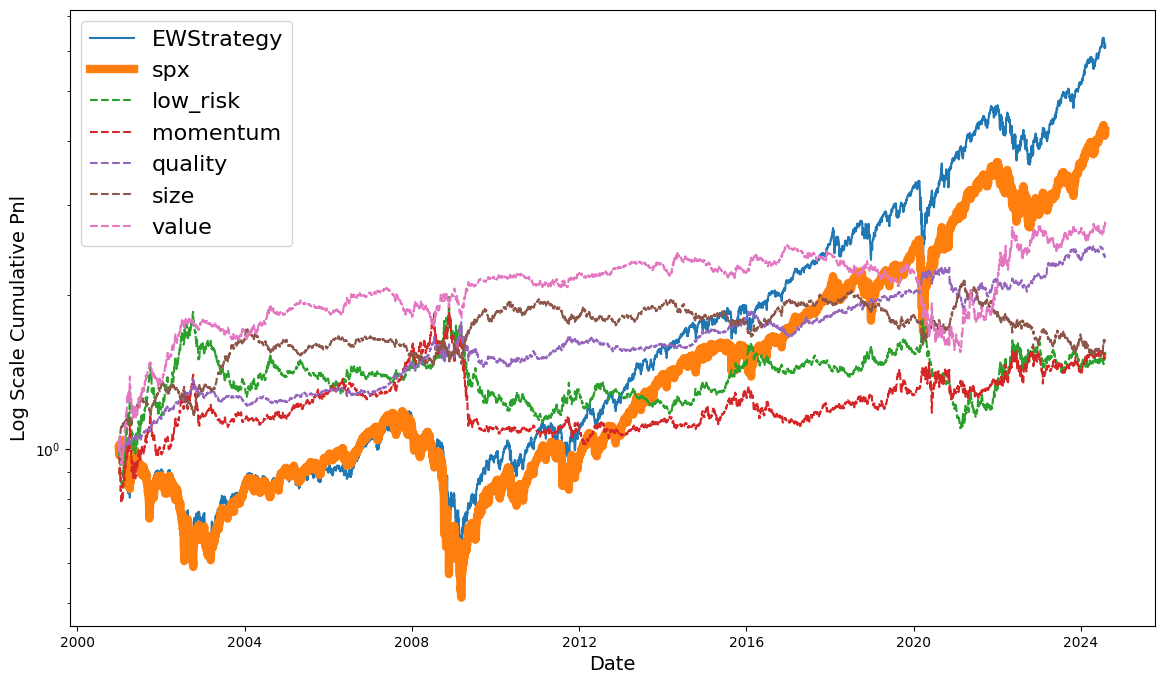

In [6]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

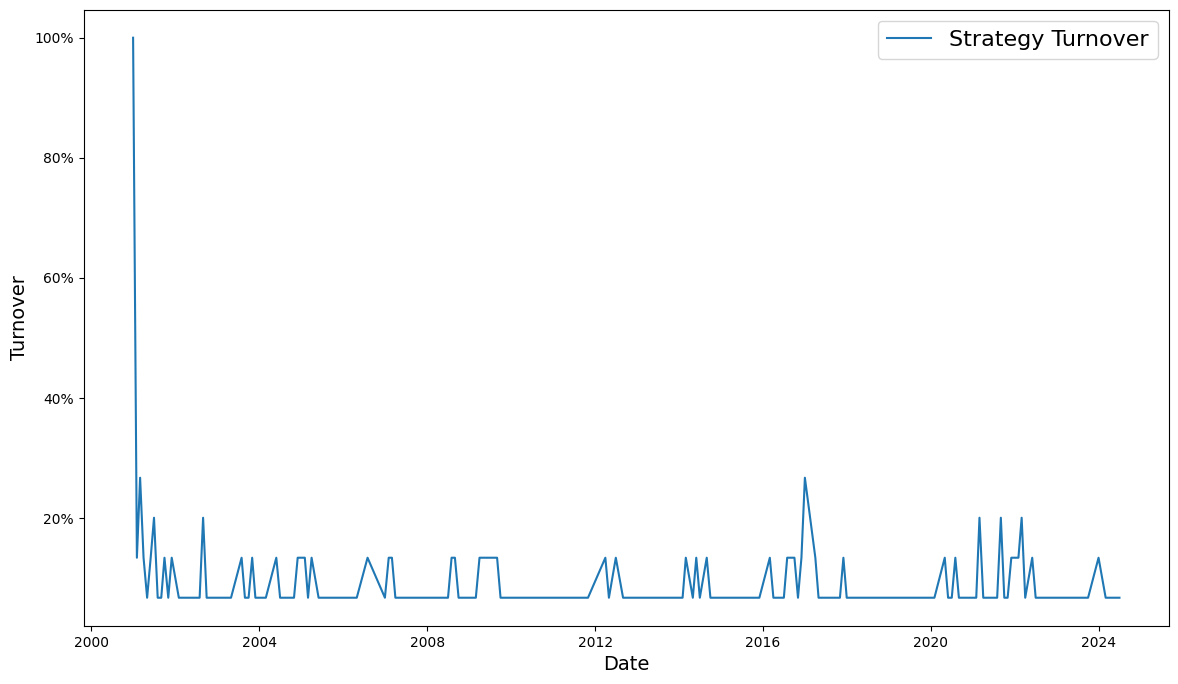

In [7]:
runner.plot_turnover()

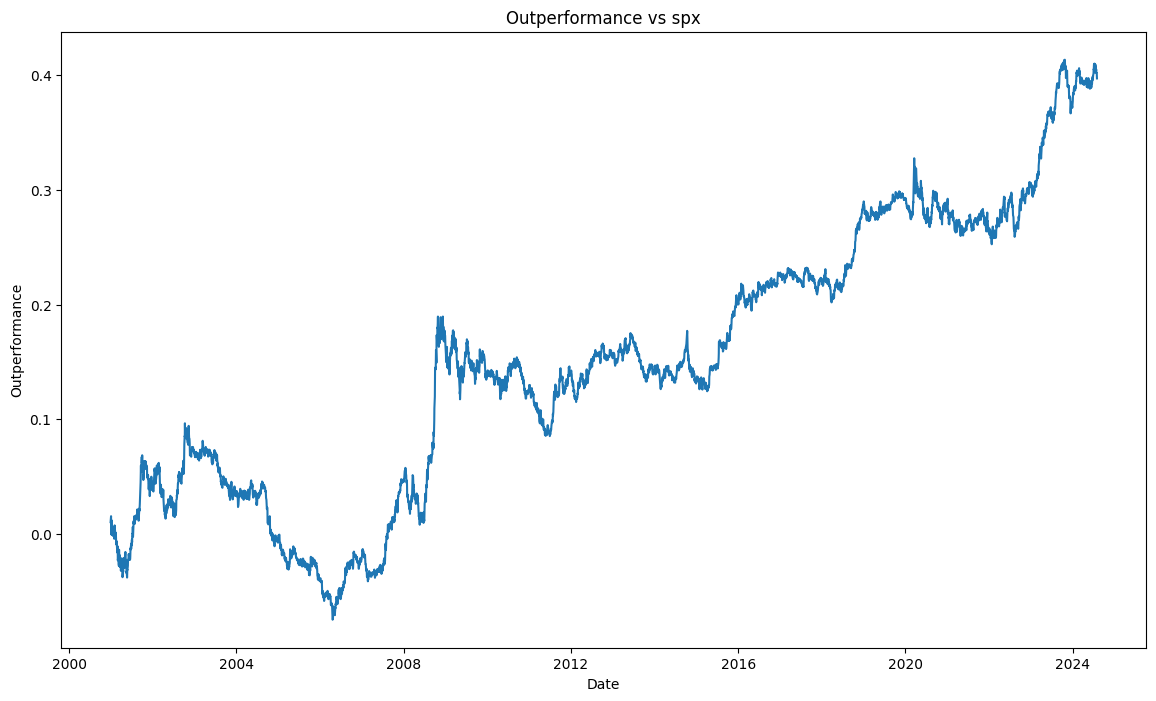

In [8]:
runner.plot_outperformance(mkt_only=True)

In [9]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")